In [1]:
#from google.colab import files
#files.upload()

In [2]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [3]:
import pandas as pd
import numpy as np

from sklearn import datasets    # Importer le module de jeu de données en ligne
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier     # Importer le module d'algorithme KNN
from sklearn.cluster import KMeans                     # Importer le module d'algorithme KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# df_big = pd.read_csv("/content/drive/MyDrive/openfoodfacts.csv", sep='\t', low_memory=False)
# df_big.head()   

df_big= pd.read_csv("Desktop\\OpenClassRoom\\Базы_данных\\openfoodfacts\\openfoodfacts.csv", sep='\t', low_memory=False)
df_big.head()


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,0000000016087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,0000000016094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_big.shape

(320772, 162)

In [6]:
df_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [7]:
# Sélection de variables pour une application

df=df_big[['code','product_name', 'countries', 'additives_n', 'ingredients_from_palm_oil_n', 'nutrition_grade_fr', 
        'nutrition-score-fr_100g', 'proteins_100g', 'sugars_100g', 'fat_100g', 'saturated-fat_100g', 'polyunsaturated-fat_100g',
        'vitamin-a_100g', 'vitamin-c_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b1_100g','vitamin-b2_100g', 
        'vitamin-b9_100g', 'calcium_100g', 'potassium_100g', 'magnesium_100g', 'phosphorus_100g',  
        'cholesterol_100g', 'fiber_100g']]
df=df.dropna(axis=0, how='all')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320772 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         320749 non-null  object 
 1   product_name                 303010 non-null  object 
 2   countries                    320492 non-null  object 
 3   additives_n                  248939 non-null  float64
 4   ingredients_from_palm_oil_n  248939 non-null  float64
 5   nutrition_grade_fr           221210 non-null  object 
 6   nutrition-score-fr_100g      221210 non-null  float64
 7   proteins_100g                259922 non-null  float64
 8   sugars_100g                  244971 non-null  float64
 9   fat_100g                     243891 non-null  float64
 10  saturated-fat_100g           229554 non-null  float64
 11  polyunsaturated-fat_100g     22859 non-null   float64
 12  vitamin-a_100g               137554 non-null  float64
 13 

In [9]:
# Recherche de doublons

df.duplicated().value_counts()

False    320770
True          2
dtype: int64

In [10]:

# Suppression des doublons

df=df.drop_duplicates(keep=False)

In [11]:
# Afficher les doublons de la variable "code"

df_dupl=df.loc[df['code'].duplicated(keep=False), :]
df_dupl.head(50)


,code,product_name,countries,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
189068,NaN,"Belgique,France","en:to-be-completed,en:nutrition-facts-complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.137,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,"Belgique,France,Suisse","en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.122,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.158,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.156,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189248,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.120,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189250,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189260,NaN,France,"en:to-be-checked,en:complete,en:nutrition-fact...",NaN,NaN,NaN,NaN,0.132,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Suppression des lignes erronées

erreur = ['Belgique,France', 'France,Suisse', 'France', 'Belgique,France,Suisse']

In [13]:
mask =~df['product_name'].isin(erreur)
df=df.loc[mask]
df.head()

,code,product_name,countries,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
0,0000000003087,Farine de blé noir,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),US,0.0,0.0,d,14.0,3.57,14.29,28.57,...,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.018,3.6
2,0000000004559,Peanuts,US,0.0,0.0,b,0.0,17.86,17.86,17.86,...,NaN,NaN,NaN,NaN,0.071,NaN,NaN,NaN,0.000,7.1
3,0000000016087,Organic Salted Nut Mix,US,0.0,0.0,d,12.0,17.86,3.57,57.14,...,NaN,NaN,NaN,NaN,0.143,NaN,NaN,NaN,NaN,7.1
4,0000000016094,Organic Polenta,US,0.0,0.0,NaN,NaN,8.57,NaN,1.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7


In [14]:
erreur2=[np.nan]

In [15]:
mask =~df['code'].isin(erreur)
df=df.loc[mask]
df.head()

,code,product_name,countries,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
0,0000000003087,Farine de blé noir,en:FR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,Banana Chips Sweetened (Whole),US,0.0,0.0,d,14.0,3.57,14.29,28.57,...,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.018,3.6
2,0000000004559,Peanuts,US,0.0,0.0,b,0.0,17.86,17.86,17.86,...,NaN,NaN,NaN,NaN,0.071,NaN,NaN,NaN,0.000,7.1
3,0000000016087,Organic Salted Nut Mix,US,0.0,0.0,d,12.0,17.86,3.57,57.14,...,NaN,NaN,NaN,NaN,0.143,NaN,NaN,NaN,NaN,7.1
4,0000000016094,Organic Polenta,US,0.0,0.0,NaN,NaN,8.57,NaN,1.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7


In [16]:
# Supprimer les lignes vides

df=df.dropna(axis=0, how='all')  

In [17]:
df['nutrition-score-fr_100g'].unique()

array([ nan,  14.,   0.,  12.,   7.,  -6.,  15.,  11.,   9.,  16.,  19.,
        -1.,   6.,  26.,  13.,  10.,  17.,  22.,  23.,  30.,   8.,  25.,
        -2.,   1.,   2.,  18.,  21.,  20.,   3.,   4.,  24.,  27.,  28.,
        -3.,  -4.,  -7.,  -5.,   5.,  29.,  31.,  -8.,  -9.,  35.,  33.,
        32.,  34., -10.,  40.,  37.,  38., -11.,  36., -13., -12., -14.,
       -15.])

In [18]:
df['nutrition_grade_fr'].unique()

array([nan, 'd', 'b', 'c', 'a', 'e'], dtype=object)

In [19]:
df=df.dropna(axis=0, subset=['product_name'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302759 non-null  object 
 3   additives_n                  247091 non-null  float64
 4   ingredients_from_palm_oil_n  247091 non-null  float64
 5   nutrition_grade_fr           218463 non-null  object 
 6   nutrition-score-fr_100g      218463 non-null  float64
 7   proteins_100g                256605 non-null  float64
 8   sugars_100g                  241910 non-null  float64
 9   fat_100g                     240584 non-null  float64
 10  saturated-fat_100g           226641 non-null  float64
 11  polyunsaturated-fat_100g     22786 non-null   float64
 12  vitamin-a_100g               137398 non-null  float64
 13 

In [21]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,polyunsaturated-fat_100g,vitamin-a_100g,vitamin-c_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
count,247091.000000,247091.000000,218463.000000,256605.000000,241910.000000,240584.000000,226641.000000,22786.000000,137398.000000,140655.00000,...,6724.000000,11088.000000,10757.000000,5193.000000,140837.000000,24718.000000,6205.000000,5814.000000,143950.000000,198587.000000
mean,1.937748,0.018912,9.151724,7.074330,15.993129,12.701388,5.115709,6.297273,0.000397,0.02335,...,0.022693,0.327350,0.260276,0.006959,0.125119,0.424563,0.537571,0.619346,0.020079,2.863581
std,2.503582,0.137898,9.052588,8.418758,22.345150,17.574028,8.008095,10.797998,0.073320,2.23813,...,1.211147,2.481523,1.280295,0.336676,3.320757,12.536264,13.550711,12.090154,0.358234,12.933636
min,0.000000,0.000000,-15.000000,-800.000000,-17.860000,0.000000,0.000000,0.000000,-0.000340,-0.00210,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.700000
25%,0.000000,0.000000,1.000000,0.700000,1.300000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000256,0.004000,0.002833,0.000030,0.000000,0.107000,0.022000,0.096250,0.000000,0.000000
50%,1.000000,0.000000,10.000000,4.760000,5.710000,5.000000,1.790000,2.220000,0.000000,0.00000,...,0.000700,0.012000,0.014167,0.000051,0.035000,0.180000,0.075000,0.206000,0.000000,1.500000
75%,3.000000,0.000000,16.000000,10.000000,24.000000,20.000000,7.140000,7.140000,0.000107,0.00370,...,0.001500,0.405000,0.300000,0.000070,0.106000,0.341000,0.141000,0.357000,0.020000,3.600000
max,31.000000,2.000000,40.000000,430.000000,3520.000000,714.290000,550.000000,98.000000,26.700000,716.98110,...,92.600000,161.000000,42.500000,23.076923,694.737000,1870.370000,657.143000,559.459000,95.238000,5380.000000


In [22]:
df1=df[(df['proteins_100g'] <0)]
df1.head()

,code,product_name,countries,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
33781,0036800416727,Whole Cashews,US,0.0,0.0,d,14.0,-3.57,3.57,46.43,...,NaN,NaN,NaN,NaN,0.071,NaN,NaN,NaN,0.0,3.6
115310,04029816,"Gourmet Blends, Seasoning, Garlic Pepper",US,0.0,0.0,NaN,NaN,-500.00,NaN,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169119,0875208001230,Lightly Dried Cilantro,US,0.0,0.0,NaN,NaN,-800.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df2=df[(df['sugars_100g'] <0)]
df2.head()

,code,product_name,countries,additives_n,ingredients_from_palm_oil_n,nutrition_grade_fr,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
8582,0011213420608,Grade A Fancy Chopped Spinach,US,0.0,0.0,a,-1.0,2.41,-1.20,0.00,...,NaN,NaN,NaN,NaN,0.096,NaN,NaN,NaN,0.000,1.2
18209,0021130493432,"Select, Spicy Red Bell Pepper Pasta Sauce",US,0.0,0.0,b,2.0,0.80,-0.80,0.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.8
117739,0608866999263,"Hummous, Black Truffle",US,1.0,0.0,a,-4.0,7.14,-3.57,3.57,...,NaN,NaN,NaN,NaN,0.071,NaN,NaN,NaN,0.000,3.6
146284,0789280259062,Crackers,US,1.0,0.0,NaN,NaN,NaN,-6.67,13.33,...,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,0.033,6.7
150858,0813922021028,"Italianavera, Tomato Sauce With Gaeta Olives &...",US,0.0,0.0,c,4.0,1.25,-6.25,6.25,...,NaN,NaN,NaN,NaN,0.050,NaN,NaN,NaN,0.000,1.2


In [24]:
# Il y a des valeurs négatives dans la base de données qui sont clairement une erreur. Changer leurs valeurs en NaN

df['proteins_100g'][df['proteins_100g'] < 0] = np.nan
df['sugars_100g'][df['sugars_100g'] < 0] = np.nan
df['vitamin-a_100g'][df['vitamin-a_100g'] < 0] = np.nan
df['fiber_100g'][df['fiber_100g'] < 0] = np.nan
df['vitamin-c_100g'][df['vitamin-c_100g'] < 0] = np.nan

In [25]:
# Il y a aussi des valeurs aberrante. On les remplace aussi par NaN

df['proteins_100g'][df['proteins_100g'] > 100] = np.nan
df['sugars_100g'][df['sugars_100g'] > 100] = np.nan
df['fat_100g'][df['fat_100g'] > 100] = np.nan
df['saturated-fat_100g'][df['saturated-fat_100g'] > 100] = np.nan
df['vitamin-a_100g'][df['vitamin-a_100g'] > 0.030] = np.nan
df['vitamin-b2_100g'][df['vitamin-b2_100g'] > 3] = np.nan
df['vitamin-b9_100g'][df['vitamin-b9_100g'] > 3] = np.nan
df['calcium_100g'][df['calcium_100g'] > 5] = np.nan
df['magnesium_100g'][df['magnesium_100g'] > 3] = np.nan
df['phosphorus_100g'][df['phosphorus_100g'] > 2] = np.nan
df['cholesterol_100g'][df['cholesterol_100g'] > 3] = np.nan
df['potassium_100g'][df['potassium_100g'] > 5] = np.nan
df['fiber_100g'][df['fiber_100g'] > 100] = np.nan
df['vitamin-c_100g'][df['vitamin-c_100g'] > 1] = np.nan
df['vitamin-b6_100g'][df['vitamin-b6_100g'] > 3] = np.nan
df['vitamin-b1_100g'][df['vitamin-b1_100g'] > 2] = np.nan
df['vitamin-pp_100g'][df['vitamin-pp_100g'] > 0.2] = np.nan

<ipython-input-25-7471eae7f141>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['proteins_100g'][df['proteins_100g'] > 100] = np.nan
<ipython-input-25-7471eae7f141>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sugars_100g'][df['sugars_100g'] > 100] = np.nan
<ipython-input-25-7471eae7f141>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['vitamin-a_100g'][df['vitamin-a_100g'] > 0.030] = np.nan
<ipython-input-25-7471eae7f1

In [26]:
df.describe()

,additives_n,ingredients_from_palm_oil_n,nutrition-score-fr_100g,proteins_100g,sugars_100g,fat_100g,saturated-fat_100g,polyunsaturated-fat_100g,vitamin-a_100g,vitamin-c_100g,...,vitamin-b6_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-b9_100g,calcium_100g,potassium_100g,magnesium_100g,phosphorus_100g,cholesterol_100g,fiber_100g
count,247091.000000,247091.000000,218463.000000,256601.000000,241892.000000,240580.000000,226638.000000,22786.000000,137382.000000,140496.000000,...,6722.000000,10995.000000,10715.000000,5190.000000,140791.000000,24669.000000,6184.000000,5795.000000,143945.000000,198582.000000
mean,1.937748,0.018912,9.151724,7.077845,15.975216,12.696195,5.111649,6.297273,0.000155,0.007567,...,0.003613,0.228523,0.207718,0.000542,0.096102,0.290481,0.105571,0.251293,0.018321,2.833600
std,2.503582,0.137898,9.052588,8.163246,21.169760,17.497914,7.906154,10.797998,0.000647,0.033208,...,0.048702,0.346971,0.373235,0.014963,0.194791,0.337943,0.142728,0.216601,0.038483,4.591686
min,0.000000,0.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.700000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000256,0.004000,0.002787,0.000030,0.000000,0.107000,0.021000,0.094500,0.000000,0.000000
50%,1.000000,0.000000,10.000000,4.760000,5.710000,5.000000,1.790000,2.220000,0.000000,0.000000,...,0.000700,0.012000,0.014167,0.000051,0.035000,0.180000,0.074750,0.204000,0.000000,1.500000
75%,3.000000,0.000000,16.000000,10.000000,24.000000,20.000000,7.140000,7.140000,0.000107,0.003600,...,0.001500,0.395000,0.299824,0.000070,0.106000,0.339000,0.140000,0.357000,0.020000,3.600000
max,31.000000,2.000000,40.000000,100.000000,100.000000,100.000000,100.000000,98.000000,0.030000,1.000000,...,1.700000,2.000000,2.833333,0.700000,5.000000,4.867000,2.857000,2.000000,1.580000,100.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302759 non-null  object 
 3   additives_n                  247091 non-null  float64
 4   ingredients_from_palm_oil_n  247091 non-null  float64
 5   nutrition_grade_fr           218463 non-null  object 
 6   nutrition-score-fr_100g      218463 non-null  float64
 7   proteins_100g                256601 non-null  float64
 8   sugars_100g                  241892 non-null  float64
 9   fat_100g                     240580 non-null  float64
 10  saturated-fat_100g           226638 non-null  float64
 11  polyunsaturated-fat_100g     22786 non-null   float64
 12  vitamin-a_100g               137382 non-null  float64
 13 

La meilleure manière de repérer les valeurs aberrantes est de tracer une boite à moustache pour chaque variable. En effet, sur les boites à moustaches sont représentés la médiane, les quartiles 25% et 75% ainsi les valeurs les plus extrêmes dans la limite de 1.5 fois la hauteur de la boîte. Il est alors assez aisé d'indentifier les valeurs qui sortent 'totalement' de ces limites.

In [28]:
# Remplacer les valeurs manquantes par la moyenne

df_new=df

df_new['countries']=df_new['countries'].fillna(df_new['countries'].mode()[0])
df_new['nutrition_grade_fr'] = df_new['nutrition_grade_fr'].fillna(df_new['nutrition_grade_fr'].mode()[0])

num_vars_name =['additives_n', 'ingredients_from_palm_oil_n',
    'nutrition-score-fr_100g', 'proteins_100g', 'sugars_100g','fat_100g', 
    'saturated-fat_100g', 'polyunsaturated-fat_100g','vitamin-a_100g', 
    'vitamin-c_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b1_100g',
    'vitamin-b2_100g', 'vitamin-b9_100g', 'calcium_100g','potassium_100g', 
    'magnesium_100g', 'phosphorus_100g', 'cholesterol_100g', 'fiber_100g']

df_new = df_new.fillna(df_new[num_vars_name].mean())

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302987 non-null  object 
 3   additives_n                  302987 non-null  float64
 4   ingredients_from_palm_oil_n  302987 non-null  float64
 5   nutrition_grade_fr           302987 non-null  object 
 6   nutrition-score-fr_100g      302987 non-null  float64
 7   proteins_100g                302987 non-null  float64
 8   sugars_100g                  302987 non-null  float64
 9   fat_100g                     302987 non-null  float64
 10  saturated-fat_100g           302987 non-null  float64
 11  polyunsaturated-fat_100g     302987 non-null  float64
 12  vitamin-a_100g               302987 non-null  float64
 13 

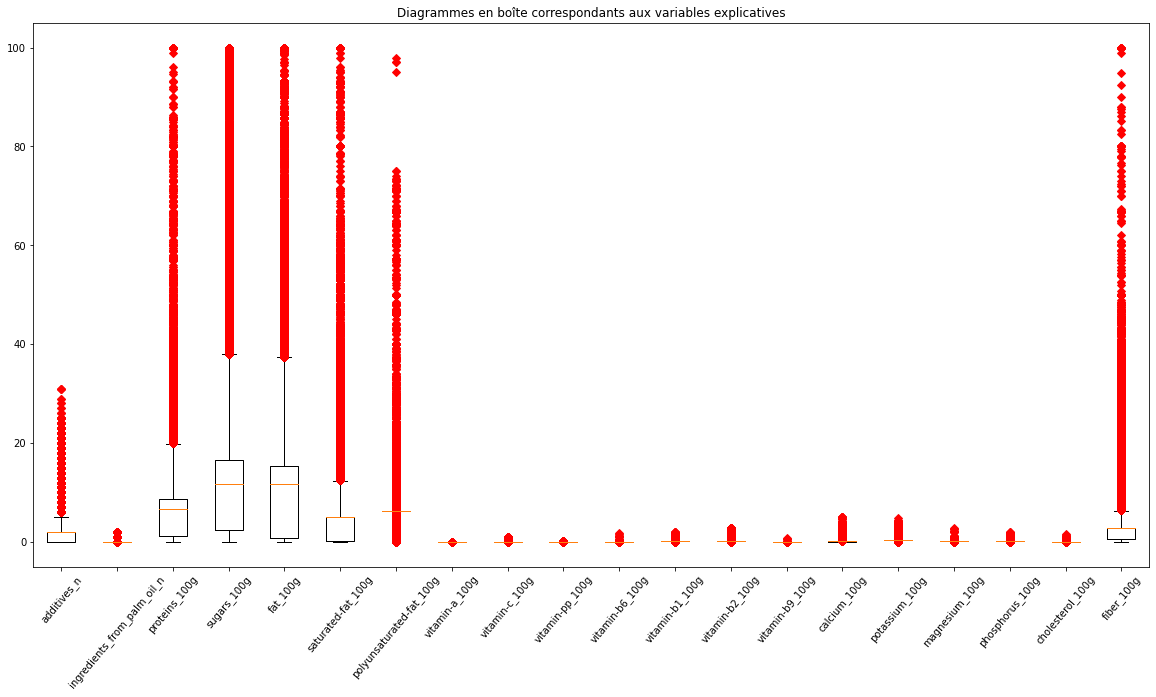

In [30]:
# •Représenter visuellement et comparer la distribution des variables, à l'aide par exemple d'un boxplot.

df_2=df_new.drop(['code', 'product_name', 'countries', 'nutrition_grade_fr', 'nutrition-score-fr_100g'], axis=1)

ls_features = list(df_2.keys())
plt.figure(figsize=(20, 10))
plt.title('Diagrammes en boîte correspondants aux variables explicatives')
plt.boxplot(df_2.values, 0, 'rD', labels = ls_features)
plt.xticks(rotation=50)
plt.show()

In [31]:
df['polyunsaturated-fat_100g'][df['polyunsaturated-fat_100g'] > 90] = np.nan

<ipython-input-31-9f4eeab472a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['polyunsaturated-fat_100g'][df['polyunsaturated-fat_100g'] > 90] = np.nan


In [32]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  302987 non-null  float64
 1   ingredients_from_palm_oil_n  302987 non-null  float64
 2   proteins_100g                302987 non-null  float64
 3   sugars_100g                  302987 non-null  float64
 4   fat_100g                     302987 non-null  float64
 5   saturated-fat_100g           302987 non-null  float64
 6   polyunsaturated-fat_100g     302987 non-null  float64
 7   vitamin-a_100g               302987 non-null  float64
 8   vitamin-c_100g               302987 non-null  float64
 9   vitamin-pp_100g              302987 non-null  float64
 10  vitamin-b6_100g              302987 non-null  float64
 11  vitamin-b1_100g              302987 non-null  float64
 12  vitamin-b2_100g              302987 non-null  float64
 13 

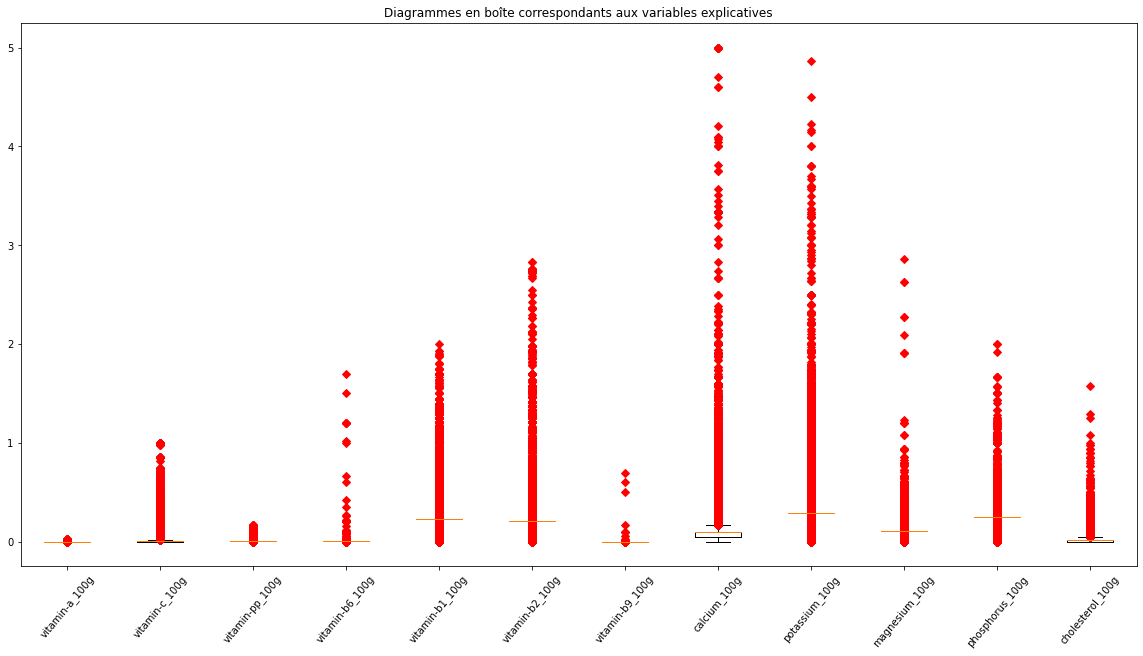

In [33]:
df_2=df_2.drop(['polyunsaturated-fat_100g', 'additives_n', 'ingredients_from_palm_oil_n', 'sugars_100g', 'fat_100g',
                'saturated-fat_100g', 'fiber_100g', 'proteins_100g'], axis=1)

ls_features = list(df_2.keys())
plt.figure(figsize=(20, 10))
plt.title('Diagrammes en boîte correspondants aux variables explicatives')
plt.boxplot(df_2.values, 0, 'rD', labels = ls_features)
plt.xticks(rotation=50)
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302987 non-null  object 
 3   additives_n                  247091 non-null  float64
 4   ingredients_from_palm_oil_n  247091 non-null  float64
 5   nutrition_grade_fr           302987 non-null  object 
 6   nutrition-score-fr_100g      218463 non-null  float64
 7   proteins_100g                256601 non-null  float64
 8   sugars_100g                  241892 non-null  float64
 9   fat_100g                     240580 non-null  float64
 10  saturated-fat_100g           226638 non-null  float64
 11  polyunsaturated-fat_100g     22782 non-null   float64
 12  vitamin-a_100g               137382 non-null  float64
 13 

In [35]:
# Pour une analyse efficace, nous changeons le type de la variable 'nutrition_grade_fr'

df['nutrition_grade_fr']=df['nutrition_grade_fr'].astype('category')
df['nutrition_grade_fr']=df['nutrition_grade_fr'].cat.codes

+ Pour trouver les valeurs manquantes des variables, j'aimerais appliquer des méthodes d'apprentissage automatique - KNN.

+ Pour appliquer la méthode KNN, nous devons avoir toutes les valeurs des variables. Je vais essayer de remplacer toutes les valeurs manquantes par 0 et voir le résultat.


In [ ]:
df_0=df.replace(to_replace= np.nan, value =0)

In [ ]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302987 non-null  object 
 3   additives_n                  302987 non-null  float64
 4   ingredients_from_palm_oil_n  302987 non-null  float64
 5   nutrition_grade_fr           302987 non-null  int8   
 6   nutrition-score-fr_100g      302987 non-null  float64
 7   proteins_100g                302987 non-null  float64
 8   sugars_100g                  302987 non-null  float64
 9   fat_100g                     302987 non-null  float64
 10  saturated-fat_100g           302987 non-null  float64
 11  polyunsaturated-fat_100g     302987 non-null  float64
 12  vitamin-a_100g               302987 non-null  float64
 13 

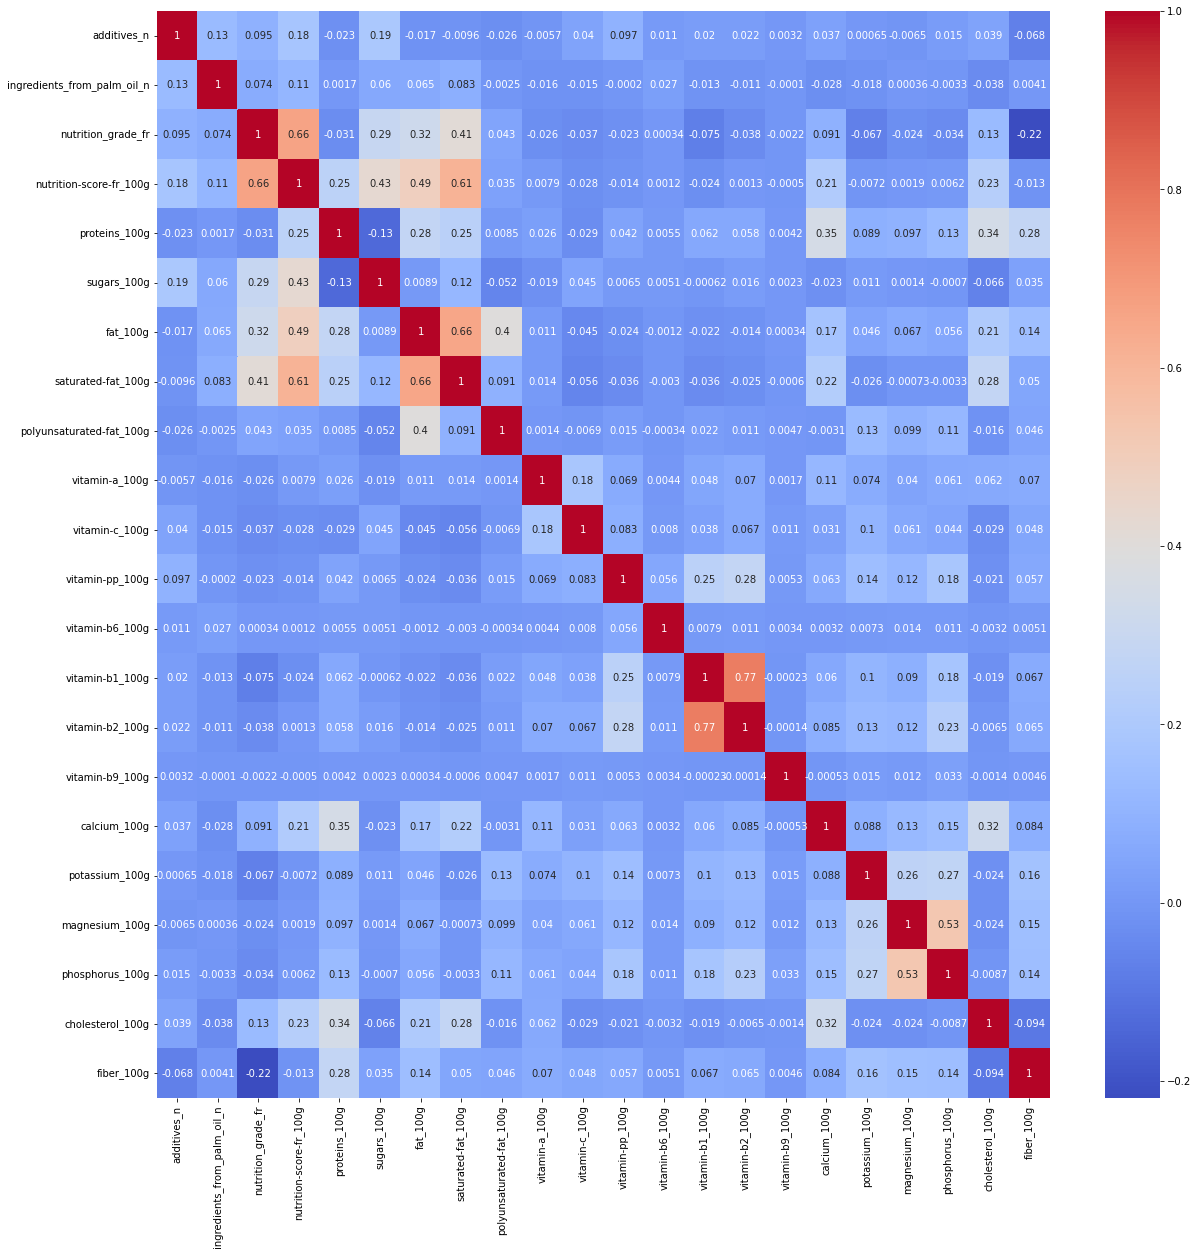

In [ ]:
# Création d'une matrice de corrélation variable

cor = df_0.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot=True,  cmap = 'coolwarm');


In [ ]:
# Application de la méthode KNN

data=df_0.drop(['nutrition_grade_fr', 'countries', 'code', 'product_name'], axis=1)

target=df_0['nutrition_grade_fr']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  302987 non-null  float64
 1   ingredients_from_palm_oil_n  302987 non-null  float64
 2   nutrition-score-fr_100g      302987 non-null  float64
 3   proteins_100g                302987 non-null  float64
 4   sugars_100g                  302987 non-null  float64
 5   fat_100g                     302987 non-null  float64
 6   saturated-fat_100g           302987 non-null  float64
 7   polyunsaturated-fat_100g     302987 non-null  float64
 8   vitamin-a_100g               302987 non-null  float64
 9   vitamin-c_100g               302987 non-null  float64
 10  vitamin-pp_100g              302987 non-null  float64
 11  vitamin-b6_100g              302987 non-null  float64
 12  vitamin-b1_100g              302987 non-null  float64
 13 

In [ ]:
print(data.shape)
print(target.shape)

(302987, 21)
(302987,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[-3.99551856e-17 -1.14911466e-17 -1.26050842e-17 -1.35343428e-16
  1.26930267e-16 -2.60895930e-18  8.15812778e-17 -5.80420158e-17
  4.38539675e-17 -4.16847204e-17 -6.80674549e-17 -2.25718950e-18
  1.96844513e-17 -2.71595594e-17 -4.23589459e-18 -1.43639332e-17
 -3.81083942e-18  1.71780915e-17  5.23843850e-17 -6.41393589e-17
  9.26327121e-18]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[ 0.00070971  0.00838613 -0.01004941  0.00156841 -0.00840812 -0.00644796
 -0.00825388  0.00376543 -0.0057995   0.00108175  0.00037479 -0.00474429
  0.00059429  0.00031993 -0.00185675 -0.00648346 -0.00268036 -0.00449632
 -0.00626776  0.00395749 -0.00420964]
[0.99516798 1.03172405 0.99610547 1.00005705 0.99212045 0.99403446
 0.98381233 1.0270014  0.92342979 1.01715658 1.02920093 0.64218155
 1.00153008 1.01925151 0.37221868 0.96802248 0.9728532  0.97412974
 0.94643792 1.02897661 0.96275998]


In [ ]:
knn_300 = neighbors.KNeighborsClassifier(n_neighbors=300) 
knn_300.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=300)

In [ ]:
score_300 = knn_300.score(X_test_scaled, y_test)
score_300

0.8363147298590713

In [ ]:
knn_1000 = neighbors.KNeighborsClassifier(n_neighbors=1000) 
knn_1000.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=1000)

In [ ]:
score_1000 = knn_1000.score(X_test_scaled, y_test)
score_1000

0.7991682893824879

In [ ]:
knn_3000 = neighbors.KNeighborsClassifier(n_neighbors=3000)
knn_3000.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3000)

In [ ]:
score_3000 = knn_3000.score(X_test_scaled, y_test)
score_3000

0.7523680649526387

In [ ]:
knn_10000 = neighbors.KNeighborsClassifier(n_neighbors=10000)
knn_10000.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=10000)

In [ ]:
score_10000 = knn_10000.score(X_test_scaled, y_test)
score_10000

0.7032410310571306

In [ ]:
knn_20000 = neighbors.KNeighborsClassifier(n_neighbors=20000)
knn_20000.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=20000)

In [ ]:
score_20000 = knn_20000.score(X_test_scaled, y_test)
score_20000
# Je n'ai pas reçu de résultat en raison de la grande quantité de données.

+ On remarque une tendance : avec une augmentation du nombre de voisins (n_neighbors), la valeur de score  diminue. 
+ Règle empirique : k est généralement inférieur à la racine carrée du nombre d'échantillons d'apprentissage. Dans notre cas, le nombre de voisins devrait être inférieur 553. Je vais essayer de trouver la valeur optimale.

In [ ]:
knn_400 = neighbors.KNeighborsClassifier(n_neighbors=400)
knn_400.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=400)

In [ ]:
score_400 = knn_400.score(X_test_scaled, y_test)
score_400

0.8265289283474702

In [ ]:
knn_200 = neighbors.KNeighborsClassifier(n_neighbors=200)
knn_200.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
score_200 = knn_200.score(X_test_scaled, y_test)
score_200

0.8469586454998514

In [ ]:
knn_100 = neighbors.KNeighborsClassifier(n_neighbors=100)
knn_100.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=100)

In [ ]:
score_100 = knn_100.score(X_test_scaled, y_test)
score_100

0.8661837024324235

In [ ]:
knn_50 = neighbors.KNeighborsClassifier()
knn_50.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
score_50 = knn_50.score(X_test_scaled, y_test)
score_50

0.9135450014851976

In [ ]:
knn_10 = neighbors.KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
score_10 = knn_10.score(X_test_scaled, y_test)
score_10

0.9064985643090531

In [ ]:
knn_5 = neighbors.KNeighborsClassifier()
knn_5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
score_5 = knn_5.score(X_test_scaled, y_test)
score_10

0.9064985643090531

Si vous regardez tous les résultats obtenus, à mon avis le meilleur - 
+ n_neighbors=50, score = 0.913545001485197.


Dans le cas suivant, nous supprimons toutes les valeurs de variables existantes.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         302987 non-null  object 
 1   product_name                 302987 non-null  object 
 2   countries                    302987 non-null  object 
 3   additives_n                  247091 non-null  float64
 4   ingredients_from_palm_oil_n  247091 non-null  float64
 5   nutrition_grade_fr           302987 non-null  int8   
 6   nutrition-score-fr_100g      218463 non-null  float64
 7   proteins_100g                256601 non-null  float64
 8   sugars_100g                  241892 non-null  float64
 9   fat_100g                     240580 non-null  float64
 10  saturated-fat_100g           226638 non-null  float64
 11  polyunsaturated-fat_100g     22782 non-null   float64
 12  vitamin-a_100g               137382 non-null  float64
 13 

In [37]:
df_no_nan=df.dropna(axis=0, subset=['proteins_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['additives_n'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['ingredients_from_palm_oil_n'])

In [38]:
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231584 entries, 1 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         231584 non-null  object 
 1   product_name                 231584 non-null  object 
 2   countries                    231584 non-null  object 
 3   additives_n                  231584 non-null  float64
 4   ingredients_from_palm_oil_n  231584 non-null  float64
 5   nutrition_grade_fr           231584 non-null  int8   
 6   nutrition-score-fr_100g      194742 non-null  float64
 7   proteins_100g                231584 non-null  float64
 8   sugars_100g                  216876 non-null  float64
 9   fat_100g                     230382 non-null  float64
 10  saturated-fat_100g           201870 non-null  float64
 11  polyunsaturated-fat_100g     22439 non-null   float64
 12  vitamin-a_100g               136536 non-null  float64
 13 

In [39]:
df_no_nan=df_no_nan.dropna(axis=0, subset=['fat_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['sugars_100g'])

In [40]:
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215795 entries, 1 to 320771
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         215795 non-null  object 
 1   product_name                 215795 non-null  object 
 2   countries                    215795 non-null  object 
 3   additives_n                  215795 non-null  float64
 4   ingredients_from_palm_oil_n  215795 non-null  float64
 5   nutrition_grade_fr           215795 non-null  int8   
 6   nutrition-score-fr_100g      193841 non-null  float64
 7   proteins_100g                215795 non-null  float64
 8   sugars_100g                  215795 non-null  float64
 9   fat_100g                     215795 non-null  float64
 10  saturated-fat_100g           195112 non-null  float64
 11  polyunsaturated-fat_100g     19973 non-null   float64
 12  vitamin-a_100g               134540 non-null  float64
 13 

In [41]:
df_no_nan=df_no_nan.dropna(axis=0, subset=['saturated-fat_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['nutrition-score-fr_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['fiber_100g'])
df_no_nan=df_no_nan.drop(['vitamin-b9_100g','magnesium_100g', 'phosphorus_100g', 'vitamin-b6_100g'], axis=1)

In [42]:
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169692 entries, 1 to 320768
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         169692 non-null  object 
 1   product_name                 169692 non-null  object 
 2   countries                    169692 non-null  object 
 3   additives_n                  169692 non-null  float64
 4   ingredients_from_palm_oil_n  169692 non-null  float64
 5   nutrition_grade_fr           169692 non-null  int8   
 6   nutrition-score-fr_100g      169692 non-null  float64
 7   proteins_100g                169692 non-null  float64
 8   sugars_100g                  169692 non-null  float64
 9   fat_100g                     169692 non-null  float64
 10  saturated-fat_100g           169692 non-null  float64
 11  polyunsaturated-fat_100g     19398 non-null   float64
 12  vitamin-a_100g               130036 non-null  float64
 13 

In [43]:
df_no_nan=df_no_nan.dropna(axis=0, subset=['cholesterol_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['calcium_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['vitamin-a_100g'])
df_no_nan=df_no_nan.dropna(axis=0, subset=['vitamin-c_100g'])


In [44]:
df_no_nan=df_no_nan.drop(['polyunsaturated-fat_100g', 'vitamin-pp_100g', 'vitamin-b1_100g', 'vitamin-b2_100g','potassium_100g'],
                  axis=1)

In [45]:
df_no_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128557 entries, 1 to 320768
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   code                         128557 non-null  object 
 1   product_name                 128557 non-null  object 
 2   countries                    128557 non-null  object 
 3   additives_n                  128557 non-null  float64
 4   ingredients_from_palm_oil_n  128557 non-null  float64
 5   nutrition_grade_fr           128557 non-null  int8   
 6   nutrition-score-fr_100g      128557 non-null  float64
 7   proteins_100g                128557 non-null  float64
 8   sugars_100g                  128557 non-null  float64
 9   fat_100g                     128557 non-null  float64
 10  saturated-fat_100g           128557 non-null  float64
 11  vitamin-a_100g               128557 non-null  float64
 12  vitamin-c_100g               128557 non-null  float64
 13 

In [46]:
df_1=df_no_nan.drop(['code', 'product_name', 'countries'], axis=1)

In [47]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128557 entries, 1 to 320768
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  128557 non-null  float64
 1   ingredients_from_palm_oil_n  128557 non-null  float64
 2   nutrition_grade_fr           128557 non-null  int8   
 3   nutrition-score-fr_100g      128557 non-null  float64
 4   proteins_100g                128557 non-null  float64
 5   sugars_100g                  128557 non-null  float64
 6   fat_100g                     128557 non-null  float64
 7   saturated-fat_100g           128557 non-null  float64
 8   vitamin-a_100g               128557 non-null  float64
 9   vitamin-c_100g               128557 non-null  float64
 10  calcium_100g                 128557 non-null  float64
 11  cholesterol_100g             128557 non-null  float64
 12  fiber_100g                   128557 non-null  float64
dtyp

In [48]:
df_1['nutrition_grade_fr'].unique()

array([3, 1, 2, 4, 0], dtype=int8)

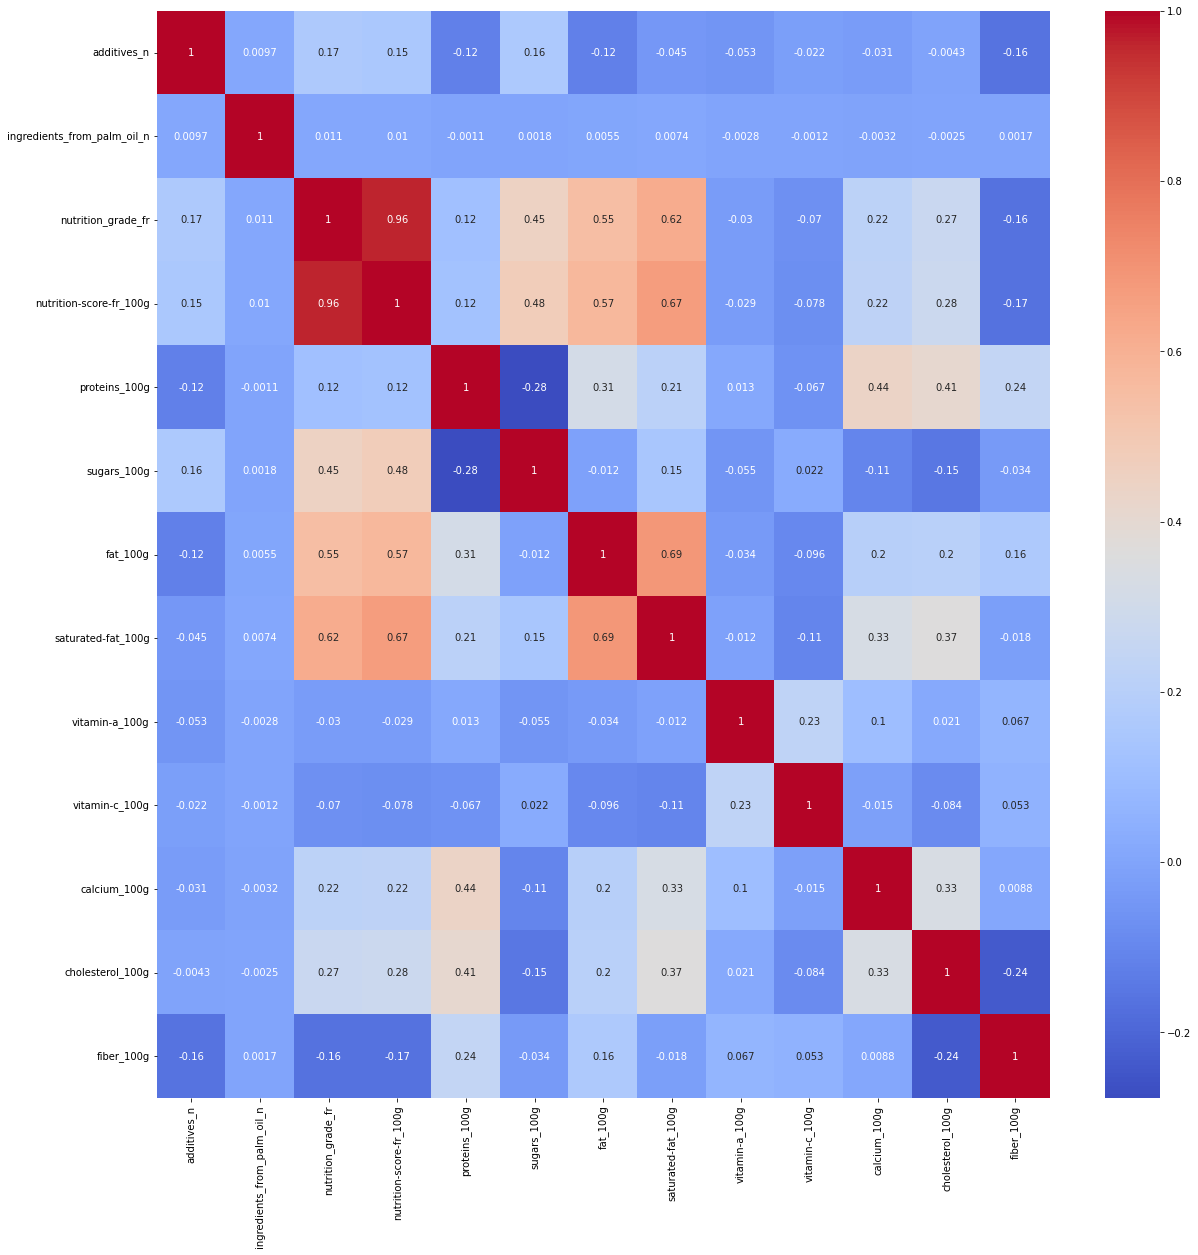

In [49]:
# Création d'une matrice de corrélation variable

cor = df_1.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor, annot=True,  cmap = 'coolwarm');


In [50]:
# Application de la méthode KNN

data=df_1.drop('nutrition_grade_fr', axis=1)

target=df_1['nutrition_grade_fr']

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128557 entries, 1 to 320768
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  128557 non-null  float64
 1   ingredients_from_palm_oil_n  128557 non-null  float64
 2   nutrition-score-fr_100g      128557 non-null  float64
 3   proteins_100g                128557 non-null  float64
 4   sugars_100g                  128557 non-null  float64
 5   fat_100g                     128557 non-null  float64
 6   saturated-fat_100g           128557 non-null  float64
 7   vitamin-a_100g               128557 non-null  float64
 8   vitamin-c_100g               128557 non-null  float64
 9   calcium_100g                 128557 non-null  float64
 10  cholesterol_100g             128557 non-null  float64
 11  fiber_100g                   128557 non-null  float64
dtypes: float64(12)
memory usage: 12.8 MB


In [52]:
print(data.shape)
print(target.shape)

(128557, 12)
(128557,)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2)

In [54]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
print(X_train_scaled.mean(axis=0))
print(X_train_scaled.std(axis=0))

[ 4.29731714e-17 -3.73078980e-18  5.33364764e-17  1.85848603e-16
  4.72566708e-17 -8.80190039e-17  2.76354800e-17  4.25586392e-17
  1.86539490e-18 -4.69803160e-18  5.84490403e-17 -2.12793196e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [55]:
X_test_scaled = scaler.transform(X_test)

print(X_test_scaled.mean(axis=0))
print(X_test_scaled.std(axis=0))

[ 0.00319749  0.01166747 -0.00160185 -0.00304902 -0.00481235  0.00320364
  0.0001048   0.0022574  -0.00200175  0.00397621 -0.00567157  0.00645247]
[1.00053294 1.41409667 1.00443652 0.99107071 0.99427816 1.00642287
 0.99356521 1.1205096  1.0007867  0.99036824 0.97617755 1.03209064]


In [56]:
knn_10000 = KNeighborsClassifier(n_neighbors=10000)
knn_10000.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10000)

In [57]:
score_10000 = knn_10000.score(X_test_scaled, y_test)
score_10000

0.6746655258245178

In [58]:
knn_3000 = KNeighborsClassifier(n_neighbors=3000)
knn_3000.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3000)

In [59]:
score_3000 = knn_3000.score(X_test_scaled, y_test)
score_3000

0.7407825140012445

In [60]:
knn_1000 = KNeighborsClassifier(n_neighbors=1000)
knn_1000.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1000)

In [61]:
score_1000 = knn_1000.score(X_test_scaled, y_test)
score_1000

0.7935205351586808

In [62]:
knn_500 = KNeighborsClassifier(n_neighbors=500)
knn_500.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=500)

In [63]:
score_500 = knn_500.score(X_test_scaled, y_test)
score_500

0.8243621655258245

In [64]:
knn_300 = KNeighborsClassifier(n_neighbors=300)
knn_300.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=300)

In [65]:
score_300 = knn_300.score(X_test_scaled, y_test)
score_300

0.8400357809583074

In [66]:
knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_100.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=100)

In [67]:
score_100 = knn_100.score(X_test_scaled, y_test)
score_100

0.8748444306160548

In [68]:
knn_50 = KNeighborsClassifier(n_neighbors=50)
knn_50.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=50)

In [69]:
score_50 = knn_50.score(X_test_scaled, y_test)
score_50

0.8913347853142501

In [70]:
knn_30 = KNeighborsClassifier(n_neighbors=30)
knn_30.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=30)

In [71]:
score_30 = knn_30.score(X_test_scaled, y_test)
score_30

0.8999688861232109

In [73]:
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [74]:
score_10 = knn_10.score(X_test_scaled, y_test)
score_10

0.9129978220286248

In [76]:
from sklearn.model_selection import GridSearchCV
clf_knn = KNeighborsClassifier()
parametres_knn = {'n_neighbors' :[(i) for i in range (2,10)]} 
grid_clf_knn = GridSearchCV(estimator=clf_knn, param_grid=parametres_knn)
grille1 = grid_clf_knn.fit(X_train_scaled,y_train)
pd.DataFrame(grille1.cv_results_)[['params', 'mean_test_score', 'std_test_score']]
print(grille1.best_params_)

{'n_neighbors': 3}


In [77]:
knn_5 = KNeighborsClassifier()
knn_5.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [78]:
score_5 = knn_5.score(X_test_scaled, y_test)
score_5

0.9195317361543248

In [79]:
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
score_3 = knn_3.score(X_test_scaled, y_test)
score_3

0.9220208462974486

+ Meilleur knn avec n_neighbors = 3 et score = 0.9220208462974486.
+ Essayons de récupérer nos données en utilisant knn.

In [36]:
df_2=df.drop(['product_name', 'countries', 'code'], axis=1)

In [37]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302987 entries, 0 to 320771
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   additives_n                  247091 non-null  float64
 1   ingredients_from_palm_oil_n  247091 non-null  float64
 2   nutrition_grade_fr           302987 non-null  int8   
 3   nutrition-score-fr_100g      218463 non-null  float64
 4   proteins_100g                256601 non-null  float64
 5   sugars_100g                  241892 non-null  float64
 6   fat_100g                     240580 non-null  float64
 7   saturated-fat_100g           226638 non-null  float64
 8   polyunsaturated-fat_100g     22782 non-null   float64
 9   vitamin-a_100g               137382 non-null  float64
 10  vitamin-c_100g               140496 non-null  float64
 11  vitamin-pp_100g              11642 non-null   float64
 12  vitamin-b6_100g              6722 non-null    float64
 13 

In [39]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df_2)
df_imputed = pd.DataFrame(imputed, columns=df_2)

KeyboardInterrupt: 

En raison du fait que nous avons une grande quantité de données, ce code prend beaucoup de temps à traiter. Par conséquent, pour une analyse plus approfondie, je remplacerai toutes les valeurs manquantes par la valeur moyenne ou le mode sur la colonne.